In [1]:
import pandas as pd
import numpy as np

np.random.seed(123)

In [2]:
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


`pdist(df, metric='euclidean')` 返回成对的距离向量。

In [5]:
pdist(df, metric='euclidean')

array([4.973534  , 5.51665266, 5.89988504, 3.83539555, 4.34707339,
       5.10431109, 6.69823298, 7.24426159, 8.31659367, 4.382864  ])

In [4]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(
    squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


注意：**不要把 `row_dist` 这个“好看” 的矩阵输入到 scipy 中，进行层次聚类，而应该使用成对距离向量或者原始数据作为输入。 **

最后一列返回每个集群成员的个数。

In [8]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(
    row_clusters,
    columns=[
        'row label 1', 'row label 2', 'distance', 'no. of items in clust.'
    ],
    index=['cluster {}'.format(i + 1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [9]:
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(
    row_clusters,
    columns=[
        'row label 1', 'row label 2', 'distance', 'no. of items in clust.'
    ],
    index=['cluster {}'.format(i + 1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


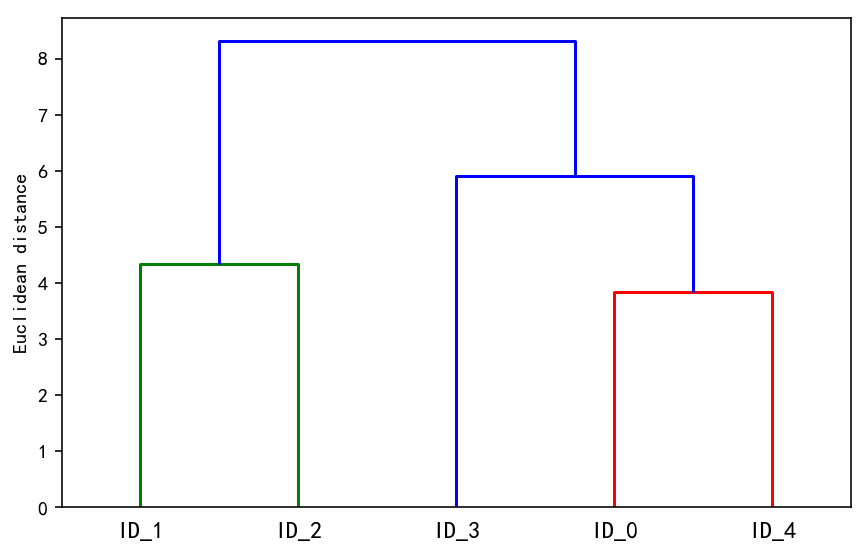

In [19]:
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(
    row_clusters,
    labels=labels,
    # make dendrogram black (part 2/2)
    # color_threshold=np.inf
)
plt.tight_layout()
plt.ylabel('Euclidean distance')
# plt.savefig('images/11_11.png', dpi=300,
#            bbox_inches='tight')
plt.show()

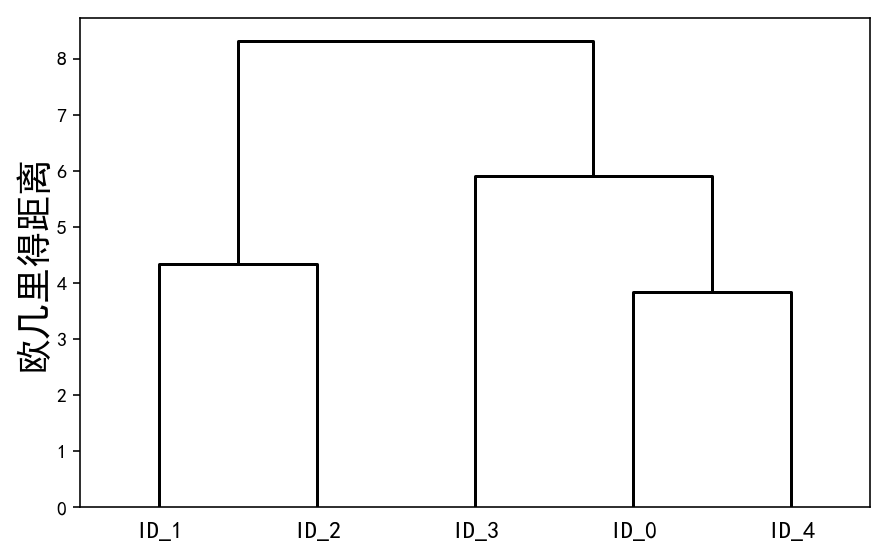

In [29]:
from scipy.cluster.hierarchy import dendrogram

from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, labels=labels, color_threshold=np.inf)
plt.tight_layout()
plt.ylabel('欧几里得距离', fontsize=18)
# plt.savefig('images/11_11.png', dpi=300,
#            bbox_inches='tight')
plt.show()

## 使用热力图

In [25]:
df.iloc[row_dendr['leaves'][::-1]]

,X,Y,Z
ID_4,4.385722,0.596779,3.980443
ID_0,6.964692,2.861393,2.268515
ID_3,3.921175,3.431780,7.290497
ID_2,9.807642,6.848297,4.809319
ID_1,5.513148,7.194690,4.231065


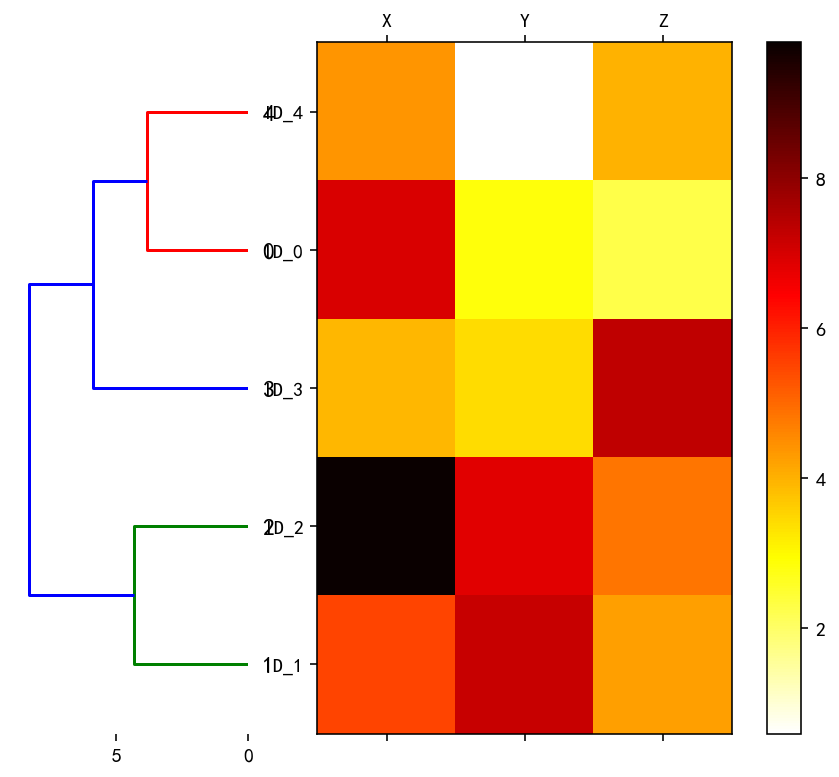

In [15]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
# 画在左边
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

#axd.set_xticks([])
#axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

plt.show()

In [18]:
row_dendr

{'color_list': ['g', 'r', 'b', 'b'],
 'dcoord': [[0.0, 4.3470733871677325, 4.3470733871677325, 0.0],
  [0.0, 3.835395554137081, 3.835395554137081, 0.0],
  [0.0, 5.899885039085129, 5.899885039085129, 3.835395554137081],
  [4.3470733871677325, 8.31659366611402, 8.31659366611402, 5.899885039085129]],
 'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'ivl': ['1', '2', '3', '0', '4'],
 'leaves': [1, 2, 3, 0, 4]}

In [26]:
df_rowclust

,X,Y,Z
ID_4,4.385722,0.596779,3.980443
ID_0,6.964692,2.861393,2.268515
ID_3,3.921175,3.431780,7.290497
ID_2,9.807642,6.848297,4.809319
ID_1,5.513148,7.194690,4.231065


##  scikit-learn 中使用层次聚类

In [30]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='complete')

In [31]:
labels = ac.fit_predict(X)
labels

array([1, 0, 0, 2, 1])

In [32]:
ac = AgglomerativeClustering(
    n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
labels

array([0, 1, 1, 0, 0])